### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [6]:
# Import ".json" file for Brazil

country_geo = r'C:\Users\hp\Olist_Project\02 Data\Original Data\geo_data\brazil_geo.json'

In [7]:
path = r'C:\Users\hp\Olist_Project\02 Data\Prepared Data'

In [8]:
# Import the dataset

df = pd.read_csv(os.path.join(path, 'merged_all.csv'))

In [9]:
with open(r'C:\Users\hp\Olist_Project\02 Data\Original Data\geo_data\brazil_geo.json') as f:
    data = json.load(f)

features = data['features']

# Print the first feature's properties
print(json.dumps(features[0]['properties'], indent=4))


{
    "name": "Acre"
}


In [10]:
# Open the JSON file
with open(r'C:\Users\hp\Olist_Project\02 Data\Original Data\geo_data\brazil_geo.json') as f:
    data = json.load(f)
    
# Get the features (states) from the JSON data
features = data['features']

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AC', 'properties': {'name': 'Acre'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.3325109999999, -7.324878999999896], [-73.274817, -7.350334], [-72.870164, -7.528881999999896], [-72.691514, -7.610621], [-72.659348, -7.624979], [-72.189666, -7.720489], [-72.173179, -7.723841], [-72.023178, -7.769827], [-72.005143, -7.774846], [-71.569238, -7.874255], [-71.5129859999999, -7.887299], [-71.241607, -7.950207], [-70.937416, -8.01909], [-70.575844, -8.09594], [-70.55023099999988, -8.101379999999892], [-70.462364, -8.120046], [-70.427306, -8.12811], [-70.369521, -8.141402], [-70.296363, -8.180022], [-70.291695, -8.182485], [-70.283623, -8.186811], [-70.12950099999989, -8.269364], [-69.7612769999999, -8.466229], [-69.641479, -8.530838], [-69.553328, -8.57838], [-69.435775, -8.641597], [-69.178231, -8.767959], [-69.162169, -8.776353], [-68.989593, -8.866563], [-68.784995, -8.972589], [-68.750061, -8.988709], [-68.734749, -8.996609], [-68.728035, -9.000075], [-

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
print(json.dumps(data, indent=4))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
print(data["features"][0]["properties"]["name"])  # Output: State 1

Acre


In [13]:
path = r'C:\Users\hp\Olist_Project\02 Data\Prepared Data'

In [14]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, 'merged_all.csv'))

In [15]:
df.head()

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.509897,-47.397865,franca,SP,office_furniture
1,1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.497396,-47.399242,franca,SP,office_furniture
2,2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.510458,-47.399550,franca,SP,office_furniture
3,3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.480940,-47.394160,franca,SP,office_furniture
4,4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.515413,-47.398193,franca,SP,office_furniture


In [16]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [17]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.509897,-47.397865,franca,SP,office_furniture
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.497396,-47.399242,franca,SP,office_furniture
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.510458,-47.399550,franca,SP,office_furniture
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.480940,-47.394160,franca,SP,office_furniture
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577,itaquaquecetuba,SP,-20.515413,-47.398193,franca,SP,office_furniture


In [18]:
df['customer_state'].unique()

array(['SP', 'SC', 'PR', 'MG', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [19]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_name_length',
       'product_description_length', 'product_photos_qty',
       'product_weight_grms', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english'],
      dtype='object')

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
# Check for missing values

df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_grms 

In [22]:
dups = df.duplicated()

In [23]:
dups.shape # no dups

(11845472,)

##### Extreme values checks

<Axes: xlabel='price', ylabel='Count'>

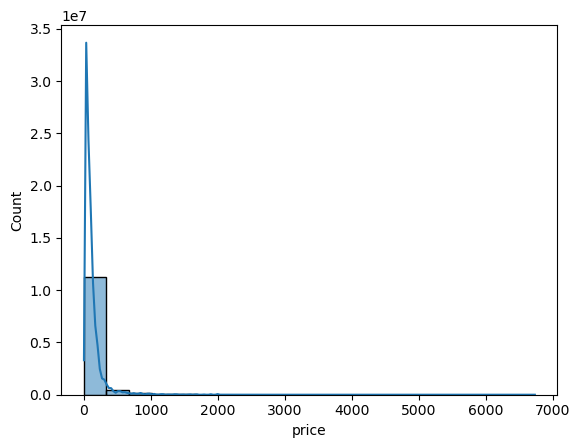

In [25]:
sns.histplot(df['price'], bins=20, kde = True) # shows extreme values for 'price'

##### no extreme values for price

In [27]:
# Check how many extreme values

df[df['price'] >10000]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english


<Axes: xlabel='payment_value', ylabel='Count'>

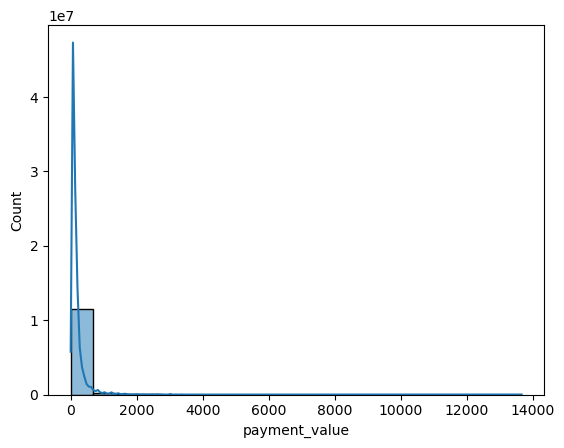

In [28]:
sns.histplot(df['payment_value'], bins=20, kde = True) # shows extreme values for 'Payment_value'

In [29]:
# Check how many extreme values

df[df['payment_value'] >10000]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
748929,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.901094,-43.182560,rio de janeiro,RJ,fixed_telephony
748930,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.902817,-43.187023,rio de janeiro,RJ,fixed_telephony
748931,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.902256,-43.185562,rio de janeiro,RJ,fixed_telephony
748932,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.899654,-43.186840,rio de janeiro,RJ,fixed_telephony
748933,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.898998,-43.187710,rio de janeiro,RJ,fixed_telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749244,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.899460,-43.187542,rio de janeiro,RJ,fixed_telephony
749245,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.897150,-43.182620,rio de janeiro,RJ,fixed_telephony
749246,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.901491,-43.183460,rio de janeiro,RJ,fixed_telephony
749247,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080.0,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,...,16.0,16.0,3667,sao paulo,SP,-22.902807,-43.187010,rio de janeiro,RJ,fixed_telephony


In [30]:
columns = ['order_status', 
           'customer_state', 'order_item_id',
           'price', 'freight_value',
           'payment_sequential', 'payment_type', 'payment_installments',
           'payment_value', 'review_score', 
           'product_photos_qty', 
           'seller_state', 'geolocation_lat', 'geolocation_lng',
           'geolocation_city', 'geolocation_state',
           'product_category_name_english']

In [31]:
# Create a subset

state_rec = df[columns]

In [32]:
state_rec.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_photos_qty,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,delivered,SP,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.509897,-47.397865,franca,SP,office_furniture
1,delivered,SP,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.497396,-47.399242,franca,SP,office_furniture
2,delivered,SP,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.510458,-47.399550,franca,SP,office_furniture
3,delivered,SP,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.480940,-47.394160,franca,SP,office_furniture
4,delivered,SP,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.515413,-47.398193,franca,SP,office_furniture


In [33]:
# Check how many extreme values

state_rec[(state_rec['payment_value'] > 13000) & (state_rec['order_item_id'] < 2)]

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_photos_qty,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
748929,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.901094,-43.182560,rio de janeiro,RJ,fixed_telephony
748930,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.902817,-43.187023,rio de janeiro,RJ,fixed_telephony
748931,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.902256,-43.185562,rio de janeiro,RJ,fixed_telephony
748932,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.899654,-43.186840,rio de janeiro,RJ,fixed_telephony
748933,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.898998,-43.187710,rio de janeiro,RJ,fixed_telephony
748934,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.901058,-43.182594,rio de janeiro,RJ,fixed_telephony
748935,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.899683,-43.185814,rio de janeiro,RJ,fixed_telephony
748936,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.899698,-43.185684,rio de janeiro,RJ,fixed_telephony
748937,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.900602,-43.181440,rio de janeiro,RJ,fixed_telephony
748938,delivered,RJ,1,1680.0,28.01,1,credit_card,1,13664.08,1,3,SP,-22.901716,-43.184070,rio de janeiro,RJ,fixed_telephony


##### No info provided on the relation between inconsistent product price and payment value. Leaving it as is for now

<Axes: xlabel='review_score', ylabel='Count'>

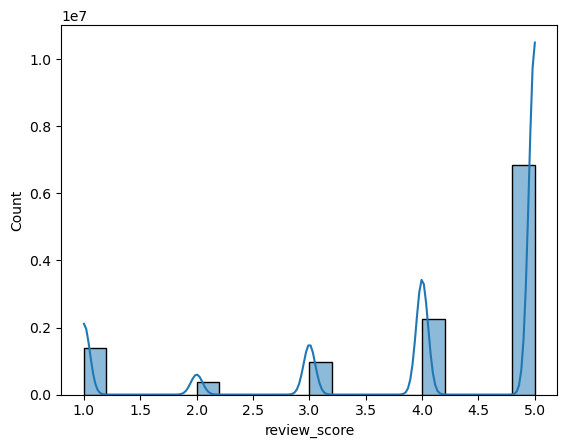

In [35]:
# Check the reviews variable

sns.histplot(state_rec['review_score'], bins=20, kde = True)

### 4. Plotting a choropleth

In [37]:
# Define the dictionary
state_map = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}

# Convert abbreviations to state names
state_rec['customer_state'] = state_rec['customer_state'].map(state_map)


C:\Users\hp\AppData\Local\Temp\ipykernel_17788\1455056173.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['customer_state'] = state_rec['customer_state'].map(state_map)


In [38]:
state_rec.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_photos_qty,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,delivered,São Paulo,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.509897,-47.397865,franca,SP,office_furniture
1,delivered,São Paulo,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.497396,-47.399242,franca,SP,office_furniture
2,delivered,São Paulo,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.510458,-47.399550,franca,SP,office_furniture
3,delivered,São Paulo,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.480940,-47.394160,franca,SP,office_furniture
4,delivered,São Paulo,1,124.99,21.88,1,credit_card,2,146.87,4,1,SP,-20.515413,-47.398193,franca,SP,office_furniture


In [39]:
# Create a data frame with just the states and the values for payment_value we want plotted

data_to_plot = state_rec[['customer_state', 'payment_value']]
data_to_plot.head()

,customer_state,payment_value
0,São Paulo,146.87
1,São Paulo,146.87
2,São Paulo,146.87
3,São Paulo,146.87
4,São Paulo,146.87


In [40]:
data_to_plot.to_csv(os.path.join.(path, 'geospatial_analysis')

SyntaxError: invalid syntax (121033727.py, line 1)

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = data_to_plot,
    columns = ['customer_state', 'payment_value'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name = "payment_value",
    tooltip=folium.features.GeoJsonTooltip(fields=['customer_state'],  # Display state name
                                           labels=True,
                                           aliases=['State: '],
                                           localize=True)

).add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
map.save('plot_data.html')